In [145]:
import pandas as pd 
import numpy as np
from datetime import datetime
from pandas.io.json import json_normalize

# Loading the data set from Github

In [147]:
import glob

path = r'.\Generated Data' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

lat_long_timestamp = pd.concat(li, axis=0, ignore_index=True)

In [148]:
lat_long_timestamp.shape

(4500, 3)

# Function to label season based on timestamp (birth date)

In [149]:
def get_season_from_month(timestamp):
    dateTimeObject = datetime.fromtimestamp(timestamp)
    month = dateTimeObject.month
    if(month in [1, 2, 12]):
        return "Winter"
    elif(month in [3, 4, 5]):
        return "Spring"
    elif(month in [6, 7, 8]):
        return "Summer"
    elif(month in [9, 10, 11]):
        return "Fall"

- Create an empty dataframe called "weather dataframe" to store the data fetched from the "Darksky" API

In [150]:
column_names = ['apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime',
       'apparentTemperatureMax', 'apparentTemperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime', 'cloudCover',
       'dewPoint', 'humidity', 'icon', 'moonPhase', 'precipAccumulation',
       'precipIntensity', 'precipIntensityMax', 'precipIntensityMaxTime',
       'precipProbability', 'precipType', 'pressure', 'summary', 'sunriseTime',
       'sunsetTime', 'temperatureHigh', 'temperatureHighTime',
       'temperatureLow', 'temperatureLowTime', 'temperatureMax',
       'temperatureMaxTime', 'temperatureMin', 'temperatureMinTime', 'time',
       'uvIndex', 'uvIndexTime', 'visibility', 'windBearing', 'windGust',
       'windGustTime', 'windSpeed']
weather_dataframe = pd.DataFrame(columns = column_names)

- Create an empty numpy array to accept empty responses from the Darksky API

In [151]:
nan_array = np.empty((1,len(column_names)))
nan_array[:] = np.nan

In [152]:
lat_long_timestamp["datetime"] = lat_long_timestamp["Birth Date"].apply(lambda x: datetime.fromtimestamp(x))
lat_long_timestamp["Season"] = lat_long_timestamp['Birth Date'].apply(lambda x: get_season_from_month(x) )

- Writing the lat_long_timestamp to CSV file

In [153]:
lat_long_timestamp.to_csv("lat_long_timestamp.csv")

# Fetching weather features from API

- We are using the 3-tuple of (latitude, longitude, timestamp) from the combined dataset to fetch data from the API
- Using a for loop, we will pass each 3-tuple from our lat_long_timestamp dataframe to obtain weather data at that particular location and time (daily aggregated). 
- Each set of features obtained foe every 3-tuple will be added to our empty initialized dataframe called "weather_dataframe"

In [154]:
api_key = "81bbbccc7288b8cc8f5e3661483a86cd"

In [155]:
for i in range(0,len(lat_long_timestamp)):
#     print("https://api.darksky.net/forecast/"+api_key+"/"+str(lat_long_timestamp["Latitude"][i])+","+str(lat_long_timestamp["Longitude"][i])+","+str(lat_long_timestamp["Birth Date"][i])+"?exclude=currently,flags"+"\t"+str(i)+"\n")
    output = []
    df_b = []
    try:
        output = pd.read_json("https://api.darksky.net/forecast/"+api_key+"/"+str(lat_long_timestamp["Latitude"][i])+","+str(lat_long_timestamp["Longitude"][i])+","+str(lat_long_timestamp["Birth Date"][i])+"?exclude=currently,flags",orient='columns')
        df_b = pd.DataFrame.from_dict(json_normalize(output["daily"][0]),orient='columns')
    except:
        output = nan_array
        df_b = pd.DataFrame(nan_array,columns=column_names)
    weather_dataframe = pd.concat([weather_dataframe,df_b])

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/28.761090999999997,-80.65353,1539522245?exclude=currently,flags	0

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/45.40078,-111.35693,1550432858?exclude=currently,flags	1

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/51.885490000000004,-99.41953000000001,1539740488?exclude=currently,flags	2

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/41.4861,-121.72665,1525683164?exclude=currently,flags	3

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/52.45843000000001,-99.95384,1532716553?exclude=currently,flags	4

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/28.62578,-81.57055,1532893931?exclude=currently,flags	5

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/38.51185,-97.22518000000001,1543652487?exclude=currently,flags	6

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/36.880466,-117.72788,1549

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/52.459630000000004,-114.64376999999999,1518459767?exclude=currently,flags	64

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/34.13722,-81.95364000000001,1548550855?exclude=currently,flags	65

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/44.68509,-122.45551,1548364045?exclude=currently,flags	66

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/42.73758,-92.651054,1554213886?exclude=currently,flags	67

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/33.830902,-114.21208999999999,1537975678?exclude=currently,flags	68

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/46.643246000000005,-114.93056999999999,1547558274?exclude=currently,flags	69

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/33.684779999999996,-109.25366000000001,1521110045?exclude=currently,flags	70

https://api.darksky.net/forecast/81bbbccc7288b8cc8

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/30.18477,-116.97232,1544463801?exclude=currently,flags	127

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/28.693665000000003,-104.476295,1523936553?exclude=currently,flags	128

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/51.1512,-95.81793,1532537279?exclude=currently,flags	129

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/50.364005999999996,-94.45976,1545264410?exclude=currently,flags	130

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/43.975998,-116.65643999999999,1528725007?exclude=currently,flags	131

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/35.43284,-93.47649399999999,1522065868?exclude=currently,flags	132

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/33.341694,-79.90746999999999,1538290165?exclude=currently,flags	133

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/44.9379

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/34.75816,-98.80789,1523684125?exclude=currently,flags	189

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/42.78432,-120.40428,1554337455?exclude=currently,flags	190

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/46.481342,-109.162544,1532631065?exclude=currently,flags	191

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/39.14485,-103.798325,1528834042?exclude=currently,flags	192

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/44.158590000000004,-99.63689000000001,1526093057?exclude=currently,flags	193

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/30.493709999999997,-97.98764,1547221487?exclude=currently,flags	194

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/38.724712,-102.53987,1519250000?exclude=currently,flags	195

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/46.617607,-90.94626,15

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/51.387306,-88.93845,1528521356?exclude=currently,flags	253

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/41.409092,-98.52072,1551073023?exclude=currently,flags	254

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/29.326373999999998,-106.55003,1535394182?exclude=currently,flags	255

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/28.41767,-93.41913000000001,1527995530?exclude=currently,flags	256

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/46.831783,-86.66699,1546131309?exclude=currently,flags	257

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/31.497705,-93.49181999999999,1555566316?exclude=currently,flags	258

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/46.556667,-95.169205,1546909216?exclude=currently,flags	259

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/52.816309999999994,-110.

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/36.94448,-87.24565,1555014036?exclude=currently,flags	317

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/50.668834999999994,-85.352776,1532827277?exclude=currently,flags	318

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/47.546172999999996,-87.65456999999999,1540972480?exclude=currently,flags	319

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/48.39985,-120.47072,1555659705?exclude=currently,flags	320

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/52.938109999999995,-83.23973000000001,1520596997?exclude=currently,flags	321

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/49.86298,-93.27260600000001,1552749362?exclude=currently,flags	322

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/41.62901,-105.54871000000001,1533011360?exclude=currently,flags	323

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e366

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/32.277943,-112.82137,1529980723?exclude=currently,flags	381

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/32.786137,-88.70863,1538837121?exclude=currently,flags	382

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/44.149315,-107.41753999999999,1554089162?exclude=currently,flags	383

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/46.479225,-113.88521599999999,1515394511?exclude=currently,flags	384

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/28.508909999999997,-93.63242,1532091554?exclude=currently,flags	385

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/48.226659999999995,-99.7697,1516039469?exclude=currently,flags	386

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/38.89078,-91.82861,1546208576?exclude=currently,flags	387

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/42.896065,-87.9

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/33.22549,-78.84071999999999,1542465578?exclude=currently,flags	444

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/42.130665,-97.47926,1525724545?exclude=currently,flags	445

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/51.730675,-91.74955,1530307359?exclude=currently,flags	446

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/42.746790000000004,-91.25957,1532446813?exclude=currently,flags	447

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/36.56387,-89.37199,1539466635?exclude=currently,flags	448

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/50.581223,-83.32364,1516018788?exclude=currently,flags	449

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/33.734120000000004,-102.206375,1535961171?exclude=currently,flags	450

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/41.37296,-82.16866,154146

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/43.688559999999995,-96.3489,1533463582?exclude=currently,flags	507

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/41.730045000000004,-88.75889000000001,1525278049?exclude=currently,flags	508

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/35.36173,-93.47977,1541951908?exclude=currently,flags	509

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/37.822124,-82.505,1550136026?exclude=currently,flags	510

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/49.54045,-110.79901000000001,1552522361?exclude=currently,flags	511

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/47.71818,-105.62755,1521705453?exclude=currently,flags	512

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/35.705459999999995,-100.107185,1552489191?exclude=currently,flags	513

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/31.845226

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/41.95745,-118.57667,1552834192?exclude=currently,flags	572

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/48.115967,-78.88304000000001,1550841487?exclude=currently,flags	573

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/51.84563,-121.191025,1533329401?exclude=currently,flags	574

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/47.60183,-102.25562,1525325793?exclude=currently,flags	575

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/34.81944,-104.11813000000001,1549451679?exclude=currently,flags	576

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/32.185715,-85.2282,1530284545?exclude=currently,flags	577

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/48.264156,-107.31683999999998,1537903658?exclude=currently,flags	578

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/28.132889000000002,-114.

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/51.37577,-97.63154,1552218326?exclude=currently,flags	635

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/33.41195,-119.481255,1530832640?exclude=currently,flags	636

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/30.86467,-106.95683000000001,1534782512?exclude=currently,flags	637

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/33.22851,-105.638405,1550507072?exclude=currently,flags	638

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/37.785957,-76.74093,1533242112?exclude=currently,flags	639

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/32.24969,-122.75403600000001,1539311888?exclude=currently,flags	640

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/44.44039,-80.96644599999999,1529567329?exclude=currently,flags	641

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/46.53242,-116.479576,1531

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/48.285088,-93.72275,1530202711?exclude=currently,flags	698

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/30.5083,-112.88049,1547000994?exclude=currently,flags	699

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/36.61752,-107.57421000000001,1522239296?exclude=currently,flags	700

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/42.50399,-100.39475,1545114141?exclude=currently,flags	701

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/45.684135,-101.78763000000001,1523056423?exclude=currently,flags	702

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/31.982588,-86.30751,1549051186?exclude=currently,flags	703

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/32.554752,-118.90834,1538860725?exclude=currently,flags	704

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/33.3356,-103.447014,1533141738?ex

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/37.623753,-94.29741,1526008657?exclude=currently,flags	763

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/36.220615,-96.676704,1554503894?exclude=currently,flags	764

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/42.760517,-115.24252,1534456511?exclude=currently,flags	765

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/33.606735,-98.821106,1544989575?exclude=currently,flags	766

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/36.710353999999995,-107.22391499999999,1518690276?exclude=currently,flags	767

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/40.987877000000005,-95.26536999999999,1530115261?exclude=currently,flags	768

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/33.898945,-105.39138,1534692736?exclude=currently,flags	769

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/28.220661,-

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/45.543659999999996,-117.8712,1536094414?exclude=currently,flags	826

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/33.806534,-87.86251999999999,1537572427?exclude=currently,flags	827

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/42.220141999999996,-120.30143000000001,1541024655?exclude=currently,flags	828

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/41.50132,-85.16566,1543548758?exclude=currently,flags	829

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/29.710005,-106.62793,1556073198?exclude=currently,flags	830

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/31.944640000000003,-102.60146,1554925688?exclude=currently,flags	831

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/44.885506,-108.98052,1553317737?exclude=currently,flags	832

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/41.5

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/42.646084,-116.3396,1549153022?exclude=currently,flags	890

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/37.950695,-120.95733,1542658849?exclude=currently,flags	891

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/32.32808,-88.57183,1554677503?exclude=currently,flags	892

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/52.55446,-109.28423000000001,1517803697?exclude=currently,flags	893

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/49.730540000000005,-86.62125,1525386416?exclude=currently,flags	894

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/37.651142,-105.19198999999999,1546586018?exclude=currently,flags	895

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/36.208709999999996,-87.64624,1523808797?exclude=currently,flags	896

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/41.36945,-87.15

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/43.8122,-85.8551,1548028040?exclude=currently,flags	954

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/46.38284,-114.23674,1532304433?exclude=currently,flags	955

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/32.30376,-86.193275,1555597189?exclude=currently,flags	956

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/44.74674,-104.921555,1532028624?exclude=currently,flags	957

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/47.81449,-86.25316,1539588142?exclude=currently,flags	958

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/47.846767,-119.92100500000001,1537653664?exclude=currently,flags	959

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/44.381508000000004,-80.45358,1556436442?exclude=currently,flags	960

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/30.790829,-83.849014,1517853764?excl

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/45.36435,-79.80337,1524874489?exclude=currently,flags	1018

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/35.911434,-116.40933999999999,1522320909?exclude=currently,flags	1019

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/46.39861,-111.61166000000001,1543068159?exclude=currently,flags	1020

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/35.438140000000004,-103.54378,1553676737?exclude=currently,flags	1021

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/41.709666999999996,-117.87671,1529802344?exclude=currently,flags	1022

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/30.249798,-116.35583500000001,1531349037?exclude=currently,flags	1023

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/44.462345,-90.29634,1530328537?exclude=currently,flags	1024

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/44.8433,-121.19505,1544678118?exclude=currently,flags	1081

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/40.838043,-119.86242,1530033571?exclude=currently,flags	1082

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/36.906982,-110.85228000000001,1549914885?exclude=currently,flags	1083

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/30.305466,-116.5863,1536101534?exclude=currently,flags	1084

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/47.421753,-89.71249399999999,1556310253?exclude=currently,flags	1085

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/30.187184999999996,-76.301,1524480381?exclude=currently,flags	1086

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/41.277153000000006,-121.2796,1526841452?exclude=currently,flags	1087

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/45.132607,

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/31.345375,-109.55126000000001,1516704578?exclude=currently,flags	1143

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/41.927475,-101.43032,1543023975?exclude=currently,flags	1144

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/50.206688,-80.20741,1549085334?exclude=currently,flags	1145

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/29.851242,-95.35407,1539361471?exclude=currently,flags	1146

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/33.84884,-98.89556999999999,1541012223?exclude=currently,flags	1147

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/38.902397,-93.20568,1539218311?exclude=currently,flags	1148

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/29.224356,-81.18525,1537359357?exclude=currently,flags	1149

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/45.701157,-87.4264,1528959

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/45.937042,-82.87854,1516052090?exclude=currently,flags	1206

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/28.780277,-90.809715,1525067408?exclude=currently,flags	1207

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/45.303444,-121.59778999999999,1522591923?exclude=currently,flags	1208

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/33.108303,-102.33419,1531228646?exclude=currently,flags	1209

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/37.840946,-102.64945999999999,1520701507?exclude=currently,flags	1210

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/42.5149,-89.871864,1541870107?exclude=currently,flags	1211

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/29.101259999999996,-92.26665,1539065207?exclude=currently,flags	1212

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/47.506992,-95.5

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/44.93496,-119.67841999999999,1534274340?exclude=currently,flags	1270

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/37.32123,-113.4949,1544404977?exclude=currently,flags	1271

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/37.719414,-86.77154499999999,1554662542?exclude=currently,flags	1272

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/51.90105,-108.12513,1551983117?exclude=currently,flags	1273

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/36.19323,-76.903755,1526441352?exclude=currently,flags	1274

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/47.7625,-83.16898,1535908508?exclude=currently,flags	1275

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/37.20015,-85.725876,1539525696?exclude=currently,flags	1276

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/48.680264,-80.67138,1535680105

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/46.70005,-100.85806,1528063510?exclude=currently,flags	1334

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/43.247234000000006,-97.53582,1523780036?exclude=currently,flags	1335

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/45.391166999999996,-103.77164,1516485114?exclude=currently,flags	1336

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/29.800303999999997,-111.78948000000001,1524738925?exclude=currently,flags	1337

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/43.920826,-83.51184,1550527214?exclude=currently,flags	1338

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/43.80194,-77.29596,1524221409?exclude=currently,flags	1339

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/36.475136,-117.53193,1522090084?exclude=currently,flags	1340

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/48.2700

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/39.306267,-116.91646000000001,1543251182?exclude=currently,flags	1397

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/34.640793,-105.9395,1534797358?exclude=currently,flags	1398

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/52.471928000000005,-100.26154,1547143818?exclude=currently,flags	1399

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/29.766901,-114.20787,1531381078?exclude=currently,flags	1400

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/43.82976,-91.91453,1532236803?exclude=currently,flags	1401

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/38.795555,-108.24475,1518399765?exclude=currently,flags	1402

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/32.649628,-111.70431,1526909163?exclude=currently,flags	1403

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/43.65553,-98.27964,1554

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/40.30278,-118.85179,1535491441?exclude=currently,flags	1460

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/48.39782,-114.43303,1538591286?exclude=currently,flags	1461

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/32.668873,-122.28396599999999,1532557613?exclude=currently,flags	1462

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/46.605470000000004,-87.12325,1516100866?exclude=currently,flags	1463

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/29.644014000000002,-80.685684,1552895458?exclude=currently,flags	1464

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/48.717377,-114.578575,1522565362?exclude=currently,flags	1465

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/47.782016999999996,-103.286934,1539787805?exclude=currently,flags	1466

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/33.

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/30.76018,-84.56345,1535526372?exclude=currently,flags	1524

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/30.664824,-84.46298,1547827090?exclude=currently,flags	1525

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/37.90484,-107.50393999999999,1533395505?exclude=currently,flags	1526

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/34.968918,-78.30045,1516776393?exclude=currently,flags	1527

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/32.66035,-110.716095,1544303623?exclude=currently,flags	1528

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/38.521374,-110.26148,1551562420?exclude=currently,flags	1529

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/39.738609999999994,-81.88941,1531071586?exclude=currently,flags	1530

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/44.747158,-84.407166,15353

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/32.178177000000005,-104.16944000000001,1535996753?exclude=currently,flags	1587

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/48.88465,-87.36336,1521437918?exclude=currently,flags	1588

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/35.558243,-120.33299,1532148763?exclude=currently,flags	1589

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/38.977184,-93.72456,1524923182?exclude=currently,flags	1590

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/38.616077000000004,-116.411934,1522722305?exclude=currently,flags	1591

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/40.385445000000004,-113.626205,1527176061?exclude=currently,flags	1592

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/38.537876000000004,-94.98350500000001,1536975742?exclude=currently,flags	1593

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/47.395720000000004,-116.84796000000001,1527383538?exclude=currently,flags	1650

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/36.8289,-77.951195,1521769707?exclude=currently,flags	1651

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/41.146214,-88.664474,1526784564?exclude=currently,flags	1652

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/44.744358,-115.89693999999999,1524215225?exclude=currently,flags	1653

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/46.67073,-91.95640999999999,1539586516?exclude=currently,flags	1654

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/51.68193,-91.62418000000001,1530494440?exclude=currently,flags	1655

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/42.71748,-77.78043000000001,1519381297?exclude=currently,flags	1656

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e36614

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/44.494713,-111.35434,1550172527?exclude=currently,flags	1713

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/46.91802,-108.51529,1536307902?exclude=currently,flags	1714

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/52.356743,-77.88618000000001,1539939753?exclude=currently,flags	1715

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/34.49028,-100.4362,1546267270?exclude=currently,flags	1716

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/36.398403,-81.92233,1550363309?exclude=currently,flags	1717

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/41.800266,-94.87495,1538111459?exclude=currently,flags	1718

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/42.23836,-78.19421,1514937565?exclude=currently,flags	1719

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/42.54432,-87.67945,1539409986?exclude

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/31.8959,-119.409966,1547363124?exclude=currently,flags	1777

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/28.29498,-107.6889,1536375521?exclude=currently,flags	1778

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/44.608185,-96.153786,1528043018?exclude=currently,flags	1779

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/40.89205,-105.85059,1526942835?exclude=currently,flags	1780

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/52.61253000000001,-108.80908000000001,1522453749?exclude=currently,flags	1781

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/30.253971000000003,-114.87386000000001,1548711802?exclude=currently,flags	1782

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/51.315979999999996,-118.134026,1522466016?exclude=currently,flags	1783

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/48.368557,-104.17414000000001,1524529394?exclude=currently,flags	1839

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/45.760983,-106.26908,1525548109?exclude=currently,flags	1840

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/45.304176,-91.51265,1547861555?exclude=currently,flags	1841

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/31.860262,-95.82681,1556655994?exclude=currently,flags	1842

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/44.1904,-80.735,1519976561?exclude=currently,flags	1843

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/37.347167999999996,-115.30071000000001,1520217660?exclude=currently,flags	1844

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/39.756015999999995,-116.17141000000001,1517259762?exclude=currently,flags	1845

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/35.979,-97.24256,1528852249?exclude=currently,flags	1902

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/31.528988000000002,-101.67949,1556450037?exclude=currently,flags	1903

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/48.501053000000006,-83.43199,1547170924?exclude=currently,flags	1904

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/28.69267,-94.235466,1556683406?exclude=currently,flags	1905

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/43.867798,-115.654,1519896746?exclude=currently,flags	1906

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/51.33591,-87.10608,1520483067?exclude=currently,flags	1907

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/38.691272999999995,-86.10383,1548552897?exclude=currently,flags	1908

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/36.19266,-107.23442,15

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/41.798313,-102.81170999999999,1534659687?exclude=currently,flags	1965

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/41.19014,-100.4713,1542017331?exclude=currently,flags	1966

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/50.92067,-84.29008,1553343922?exclude=currently,flags	1967

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/52.965202000000005,-101.27371,1524830500?exclude=currently,flags	1968

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/44.284442999999996,-88.15331,1551918051?exclude=currently,flags	1969

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/47.99615,-86.956314,1552014065?exclude=currently,flags	1970

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/38.286,-87.175896,1549626313?exclude=currently,flags	1971

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/38.34774,-78.610535,

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/37.265583,-106.61537,1544541400?exclude=currently,flags	2028

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/46.96785,-122.47592,1533767555?exclude=currently,flags	2029

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/45.538579999999996,-80.76843000000001,1544398912?exclude=currently,flags	2030

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/49.976040000000005,-102.97069499999999,1521007573?exclude=currently,flags	2031

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/46.761109999999995,-110.93567,1521420114?exclude=currently,flags	2032

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/49.687090000000005,-103.25742,1535226241?exclude=currently,flags	2033

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/28.100039000000002,-104.79987,1521996610?exclude=currently,flags	2034

https://api.darksky.net/forecast/81bbbccc72

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/49.153866,-88.69539,1533867052?exclude=currently,flags	2091

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/39.45427,-113.6903,1517502300?exclude=currently,flags	2092

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/48.111824,-85.85172,1517790280?exclude=currently,flags	2093

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/35.91543,-86.67017,1528094219?exclude=currently,flags	2094

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/32.989509999999996,-91.48881,1522487751?exclude=currently,flags	2095

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/45.407524,-111.4728,1522631895?exclude=currently,flags	2096

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/39.577686,-80.65267,1543695766?exclude=currently,flags	2097

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/28.777332,-98.88133,1555691903?exclude

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/40.53859,-82.25757,1537102537?exclude=currently,flags	2154

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/47.282913,-93.81108,1541806895?exclude=currently,flags	2155

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/50.30537,-76.932365,1552598120?exclude=currently,flags	2156

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/35.88105,-82.76815,1555320956?exclude=currently,flags	2157

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/38.515144,-80.171196,1540765777?exclude=currently,flags	2158

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/52.600376000000004,-80.33589,1554880533?exclude=currently,flags	2159

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/50.278209999999994,-91.53313,1534486063?exclude=currently,flags	2160

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/50.815605,-79.32998,15297699

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/33.551758,-88.63888,1531320662?exclude=currently,flags	2217

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/28.790090000000003,-85.789925,1534668673?exclude=currently,flags	2218

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/44.589490000000005,-118.48697,1520040988?exclude=currently,flags	2219

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/36.88306,-83.1686,1555499196?exclude=currently,flags	2220

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/34.415946999999996,-110.54876999999999,1546560480?exclude=currently,flags	2221

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/43.7723,-113.948204,1543606351?exclude=currently,flags	2222

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/42.16956,-111.65047,1539815968?exclude=currently,flags	2223

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/29.23855

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/52.570564000000005,-116.11946999999999,1525146102?exclude=currently,flags	2281

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/47.304959999999994,-88.58445,1548554680?exclude=currently,flags	2282

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/33.36943,-101.59567,1529565715?exclude=currently,flags	2283

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/43.298134000000005,-112.830894,1553091128?exclude=currently,flags	2284

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/30.809241999999998,-92.15732,1533586867?exclude=currently,flags	2285

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/43.38735,-96.84979,1553867334?exclude=currently,flags	2286

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/43.402640000000005,-112.40135,1549903015?exclude=currently,flags	2287

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/46.958866,-114.24918000000001,1537174431?exclude=currently,flags	2344

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/49.602825,-85.99776999999999,1524487876?exclude=currently,flags	2345

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/37.657513,-80.75545,1524546255?exclude=currently,flags	2346

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/41.30777,-103.40155,1531112022?exclude=currently,flags	2347

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/30.288424,-109.41637,1533861757?exclude=currently,flags	2348

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/40.52694,-119.41328999999999,1540421654?exclude=currently,flags	2349

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/33.157337,-83.70096600000001,1547951063?exclude=currently,flags	2350

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/48.3183

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/44.936283,-91.267876,1525820804?exclude=currently,flags	2407

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/52.168182,-83.122215,1554941853?exclude=currently,flags	2408

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/49.841164,-90.30678,1531802232?exclude=currently,flags	2409

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/32.82308,-92.54598,1515319658?exclude=currently,flags	2410

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/38.339073,-79.63877,1544464052?exclude=currently,flags	2411

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/47.508736,-106.45583,1530956418?exclude=currently,flags	2412

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/47.97077,-111.32574,1543278579?exclude=currently,flags	2413

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/52.487019999999994,-113.35076000000001,1543

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/40.419540000000005,-106.75248,1555328319?exclude=currently,flags	2470

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/30.712353000000004,-90.48605,1517023851?exclude=currently,flags	2471

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/36.64588,-79.36539,1536604267?exclude=currently,flags	2472

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/33.30311,-99.7006,1546906681?exclude=currently,flags	2473

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/50.594444,-94.72518000000001,1525243189?exclude=currently,flags	2474

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/33.1668,-93.64064,1548880118?exclude=currently,flags	2475

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/51.502098,-98.2132,1555985615?exclude=currently,flags	2476

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/45.354103,-111.6739,153

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/35.98535,-119.767845,1547574940?exclude=currently,flags	2534

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/45.992509999999996,-106.57328999999999,1539838371?exclude=currently,flags	2535

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/44.18417,-84.281296,1535077575?exclude=currently,flags	2536

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/40.325718,-95.24774000000001,1556486686?exclude=currently,flags	2537

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/34.567894,-116.84111000000001,1537469904?exclude=currently,flags	2538

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/35.499970000000005,-99.99551,1555253934?exclude=currently,flags	2539

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/39.393485999999996,-83.16320999999999,1547836799?exclude=currently,flags	2540

https://api.darksky.net/forecast/81bbbccc7288

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/33.531345,-82.32016,1545308653?exclude=currently,flags	2596

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/28.420215999999996,-96.693924,1544247733?exclude=currently,flags	2597

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/28.847351,-92.39244000000001,1556748062?exclude=currently,flags	2598

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/36.395912,-84.37848000000001,1548119155?exclude=currently,flags	2599

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/44.2262,-110.53183999999999,1555128139?exclude=currently,flags	2600

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/43.48645,-76.13531,1546750822?exclude=currently,flags	2601

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/52.158733000000005,-93.92484,1555000320?exclude=currently,flags	2602

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/3

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/38.496635,-122.10120400000001,1554291337?exclude=currently,flags	2660

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/34.58092,-99.15121500000001,1546473251?exclude=currently,flags	2661

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/52.84834300000001,-111.463646,1547454451?exclude=currently,flags	2662

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/41.80767,-115.66233000000001,1518279634?exclude=currently,flags	2663

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/31.67495,-84.32196,1526423174?exclude=currently,flags	2664

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/49.94908,-76.42303000000001,1555551919?exclude=currently,flags	2665

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/49.39886,-96.21079,1528710933?exclude=currently,flags	2666

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/31

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/49.706146000000004,-80.68463,1552751226?exclude=currently,flags	2724

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/35.928288,-94.825066,1540782264?exclude=currently,flags	2725

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/52.309406,-97.90964,1528549946?exclude=currently,flags	2726

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/36.770953999999996,-76.39785,1533065314?exclude=currently,flags	2727

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/49.412440000000004,-84.23193,1554182169?exclude=currently,flags	2728

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/48.763847,-103.65789000000001,1530205145?exclude=currently,flags	2729

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/46.447315,-99.50144,1534686830?exclude=currently,flags	2730

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/40.4283

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/48.710915,-86.78050999999999,1556421502?exclude=currently,flags	2786

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/44.71747,-97.64745,1535046494?exclude=currently,flags	2787

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/45.60687,-101.17706,1523162689?exclude=currently,flags	2788

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/41.32708,-116.40397,1549945652?exclude=currently,flags	2789

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/34.68233,-84.76026999999999,1527632404?exclude=currently,flags	2790

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/36.170273,-83.590195,1536711938?exclude=currently,flags	2791

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/33.876923,-90.70785500000001,1529958948?exclude=currently,flags	2792

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/35.134403000000006,

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/28.938213,-119.27583999999999,1543814577?exclude=currently,flags	2849

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/44.476143,-99.58530400000001,1527164065?exclude=currently,flags	2850

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/31.142908000000002,-112.82529,1529544396?exclude=currently,flags	2851

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/49.7108,-119.629295,1544477566?exclude=currently,flags	2852

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/43.53655,-76.8969,1533032993?exclude=currently,flags	2853

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/50.90487,-88.52409,1538928180?exclude=currently,flags	2854

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/34.760433,-104.81697,1549135106?exclude=currently,flags	2855

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/37.701797,-115.302

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/50.96009,-120.78262,1526732950?exclude=currently,flags	2913

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/30.990446000000002,-112.18338,1542024778?exclude=currently,flags	2914

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/41.4256,-95.93285999999999,1546430098?exclude=currently,flags	2915

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/41.446870000000004,-77.228386,1535994732?exclude=currently,flags	2916

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/45.22265,-100.47161,1551846647?exclude=currently,flags	2917

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/52.485046,-90.98721,1537144362?exclude=currently,flags	2918

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/45.241946999999996,-81.59387,1537588741?exclude=currently,flags	2919

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/33.41483,

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/42.19214,-82.35519000000001,1528238343?exclude=currently,flags	2976

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/42.950424,-104.4539,1524775794?exclude=currently,flags	2977

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/31.486653999999998,-91.53775,1535223832?exclude=currently,flags	2978

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/29.669333,-91.193214,1524206260?exclude=currently,flags	2979

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/49.531128,-122.42226399999998,1520091664?exclude=currently,flags	2980

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/35.5563,-121.19031000000001,1545079062?exclude=currently,flags	2981

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/50.567623,-117.54986000000001,1555742223?exclude=currently,flags	2982

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/28.469728000000003,-121.60576,1519273875?exclude=currently,flags	3038

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/43.60603,-88.82253,1528908741?exclude=currently,flags	3039

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/30.140732,-116.97893,1530521836?exclude=currently,flags	3040

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/37.631029999999996,-119.52908000000001,1518390840?exclude=currently,flags	3041

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/39.638504,-81.84518,1554668144?exclude=currently,flags	3042

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/51.294167,-78.7171,1554430008?exclude=currently,flags	3043

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/44.75847,-82.626465,1521706030?exclude=currently,flags	3044

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/35.21492399999999

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/41.220196,-105.965126,1528977413?exclude=currently,flags	3102

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/34.86634,-111.54273,1532691182?exclude=currently,flags	3103

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/50.210033,-91.198235,1528886765?exclude=currently,flags	3104

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/34.95988,-106.269775,1542636572?exclude=currently,flags	3105

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/28.807526,-104.39684,1520569192?exclude=currently,flags	3106

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/47.653053,-117.64863999999999,1515291501?exclude=currently,flags	3107

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/37.82485,-105.12303,1556659600?exclude=currently,flags	3108

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/51.9418,-106.537476,1522668463

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/42.98887,-107.861534,1551064487?exclude=currently,flags	3166

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/50.403294,-98.70308,1550369352?exclude=currently,flags	3167

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/51.695065,-94.60271,1552175813?exclude=currently,flags	3168

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/40.8171,-91.12684,1543406948?exclude=currently,flags	3169

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/39.751057,-113.98546,1517262227?exclude=currently,flags	3170

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/33.39502,-117.822685,1528420945?exclude=currently,flags	3171

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/49.649772999999996,-99.926735,1539339649?exclude=currently,flags	3172

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/51.23808,-112.57135,1527816321?exc

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/49.289265,-76.16575999999999,1548740337?exclude=currently,flags	3230

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/42.78472,-107.48686000000001,1541032722?exclude=currently,flags	3231

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/33.459503000000005,-111.94384,1520288274?exclude=currently,flags	3232

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/42.29637,-80.46030999999999,1539873206?exclude=currently,flags	3233

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/43.87908,-120.82125,1551572774?exclude=currently,flags	3234

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/45.27543,-86.93359,1548849504?exclude=currently,flags	3235

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/39.483191999999995,-104.50029,1525811417?exclude=currently,flags	3236

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/39.258327,-99.11598000000001,1521698178?exclude=currently,flags	3294

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/46.6666,-110.48358999999999,1541870477?exclude=currently,flags	3295

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/35.372814,-84.67132,1543625107?exclude=currently,flags	3296

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/45.921017,-100.13741999999999,1515240755?exclude=currently,flags	3297

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/34.790478,-86.1509,1515756644?exclude=currently,flags	3298

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/48.51918,-96.14879,1519193241?exclude=currently,flags	3299

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/29.286114,-97.47381999999999,1525332503?exclude=currently,flags	3300

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/39.37106,-7

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/41.9501,-99.96394000000001,1532964251?exclude=currently,flags	3358

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/47.883213,-101.29619,1531605754?exclude=currently,flags	3359

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/43.963809999999995,-98.584076,1544135049?exclude=currently,flags	3360

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/51.515015000000005,-77.30785,1528518713?exclude=currently,flags	3361

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/34.74753,-81.50667,1522701195?exclude=currently,flags	3362

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/38.314182,-103.301735,1552386494?exclude=currently,flags	3363

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/29.723312,-95.43415999999999,1522823804?exclude=currently,flags	3364

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/50.60635

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/50.109004999999996,-121.45253999999998,1514850075?exclude=currently,flags	3421

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/48.674859999999995,-121.82862,1538330012?exclude=currently,flags	3422

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/30.898678000000004,-105.77186599999999,1541568760?exclude=currently,flags	3423

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/44.285340000000005,-101.52898,1525771283?exclude=currently,flags	3424

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/50.442577,-90.73917,1528376170?exclude=currently,flags	3425

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/50.49035,-77.77996,1534596155?exclude=currently,flags	3426

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/44.2336,-79.62521,1542939406?exclude=currently,flags	3427

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e366

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/45.112614,-81.45342,1525722697?exclude=currently,flags	3483

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/51.1564,-104.74448000000001,1550634203?exclude=currently,flags	3484

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/46.393127,-117.78242,1539032093?exclude=currently,flags	3485

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/39.519875,-112.658745,1523156460?exclude=currently,flags	3486

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/42.817417,-92.30552,1555138701?exclude=currently,flags	3487

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/46.51365,-122.60098,1555401074?exclude=currently,flags	3488

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/52.910132999999995,-107.19997,1529132273?exclude=currently,flags	3489

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/30.557999,-97.74812,1518

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/35.410267,-80.67673,1527748118?exclude=currently,flags	3545

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/40.421402,-86.37749000000001,1548042500?exclude=currently,flags	3546

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/35.266265999999995,-105.23523999999999,1553830670?exclude=currently,flags	3547

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/39.352825,-77.51599,1519699182?exclude=currently,flags	3548

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/32.40406,-114.58173000000001,1516619228?exclude=currently,flags	3549

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/33.470528,-104.56319,1545828372?exclude=currently,flags	3550

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/50.743553000000006,-93.95215,1546193748?exclude=currently,flags	3551

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86c

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/50.422737,-98.35453000000001,1534335491?exclude=currently,flags	3608

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/42.22444,-118.53522,1536696705?exclude=currently,flags	3609

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/50.234154,-79.56993,1538343118?exclude=currently,flags	3610

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/31.916341999999997,-119.75831000000001,1526086595?exclude=currently,flags	3611

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/49.739407,-82.761925,1532140034?exclude=currently,flags	3612

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/47.314964,-114.26585,1531635057?exclude=currently,flags	3613

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/49.89193,-96.619736,1516182250?exclude=currently,flags	3614

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/33.34945,-122.9

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/28.4132,-120.11922,1515338601?exclude=currently,flags	3672

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/37.492558,-105.445045,1538075953?exclude=currently,flags	3673

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/34.862885,-84.2689,1555435090?exclude=currently,flags	3674

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/42.572390000000006,-85.6935,1515671511?exclude=currently,flags	3675

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/37.42447,-81.59323,1528793155?exclude=currently,flags	3676

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/50.902733000000005,-108.46628999999999,1555893445?exclude=currently,flags	3677

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/34.173683000000004,-107.36322,1523627466?exclude=currently,flags	3678

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/29.290117

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/51.803738,-89.85302,1548688060?exclude=currently,flags	3736

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/49.74528,-84.4751,1549679911?exclude=currently,flags	3737

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/29.55465,-90.651924,1531480589?exclude=currently,flags	3738

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/28.94625,-119.13901499999999,1533009833?exclude=currently,flags	3739

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/34.29482,-111.41311999999999,1515454609?exclude=currently,flags	3740

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/44.112922999999995,-103.62004,1541338616?exclude=currently,flags	3741

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/32.175793,-100.13302,1538110870?exclude=currently,flags	3742

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/29.111634999999996

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/45.92633,-86.20752,1532207514?exclude=currently,flags	3800

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/48.901775,-93.901344,1524276642?exclude=currently,flags	3801

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/30.541689,-116.65058,1532783810?exclude=currently,flags	3802

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/46.255787,-88.4335,1549618808?exclude=currently,flags	3803

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/46.372467,-91.62345,1525346381?exclude=currently,flags	3804

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/30.613838,-103.77138000000001,1544237546?exclude=currently,flags	3805

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/33.237053,-115.33551999999999,1545252780?exclude=currently,flags	3806

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/34.177193,-105.2876800000

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/30.757915,-101.94495,1556303992?exclude=currently,flags	3863

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/29.959984000000002,-93.96066,1544586962?exclude=currently,flags	3864

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/42.949696,-95.17261500000001,1543428249?exclude=currently,flags	3865

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/41.618415999999996,-118.79486000000001,1523211532?exclude=currently,flags	3866

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/45.751490000000004,-113.91078,1523765748?exclude=currently,flags	3867

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/44.13813,-101.44951,1541755937?exclude=currently,flags	3868

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/35.97503,-108.782486,1537306910?exclude=currently,flags	3869

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a8

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/29.962294,-78.18828,1532332631?exclude=currently,flags	3927

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/35.318867,-109.320435,1540177846?exclude=currently,flags	3928

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/48.399986,-90.30095,1524949954?exclude=currently,flags	3929

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/42.2548,-89.173996,1517300755?exclude=currently,flags	3930

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/28.805313,-113.21398,1532106009?exclude=currently,flags	3931

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/51.88878,-89.597755,1522114377?exclude=currently,flags	3932

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/38.89482,-121.71706999999999,1544764185?exclude=currently,flags	3933

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/30.958070000000003,-84.26432,15196

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/34.39412,-91.539276,1538766511?exclude=currently,flags	3990

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/49.785328,-116.77961,1551285819?exclude=currently,flags	3991

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/37.689514,-113.64211,1539377601?exclude=currently,flags	3992

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/51.31731,-101.93226,1552290676?exclude=currently,flags	3993

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/37.734394,-80.4878,1526122198?exclude=currently,flags	3994

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/49.517853,-87.5517,1554741753?exclude=currently,flags	3995

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/41.683617,-110.53289,1549446331?exclude=currently,flags	3996

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/51.33084,-84.27171,1546835566?exclude=curren

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/52.630527,-103.48295,1524407967?exclude=currently,flags	4053

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/52.137543,-83.39171999999999,1556463904?exclude=currently,flags	4054

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/42.286392,-113.20691000000001,1556775317?exclude=currently,flags	4055

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/50.39115,-96.26402,1555009335?exclude=currently,flags	4056

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/50.252663,-103.99476999999999,1525059724?exclude=currently,flags	4057

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/47.539764,-112.93775,1538630048?exclude=currently,flags	4058

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/50.169140000000006,-122.61618,1517407395?exclude=currently,flags	4059

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/47.95

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/36.277885,-100.78737,1538977128?exclude=currently,flags	4117

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/43.483146999999995,-97.301926,1535413738?exclude=currently,flags	4118

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/52.640327,-86.97912600000001,1556271254?exclude=currently,flags	4119

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/49.605713,-81.919624,1540535429?exclude=currently,flags	4120

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/31.475407,-100.60327,1518762000?exclude=currently,flags	4121

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/43.999294,-99.411194,1545132705?exclude=currently,flags	4122

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/42.86076,-112.61545600000001,1522566408?exclude=currently,flags	4123

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/34.58446,-88.

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/28.793877000000002,-77.80086,1531060433?exclude=currently,flags	4180

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/36.79399,-76.98857,1540755475?exclude=currently,flags	4181

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/45.75022,-114.80375,1547545242?exclude=currently,flags	4182

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/42.641624,-84.3649,1539571085?exclude=currently,flags	4183

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/36.218796000000005,-85.27026,1543233019?exclude=currently,flags	4184

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/49.386246,-90.52946999999999,1525076262?exclude=currently,flags	4185

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/52.818430000000006,-83.329285,1530764403?exclude=currently,flags	4186

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/37.838654,

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/41.45671,-106.487495,1548994368?exclude=currently,flags	4244

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/48.501934000000006,-91.15508,1522765950?exclude=currently,flags	4245

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/42.655407000000004,-85.128105,1536188464?exclude=currently,flags	4246

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/37.197734999999994,-116.18143,1549126585?exclude=currently,flags	4247

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/46.332138,-83.61888,1535968439?exclude=currently,flags	4248

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/29.68272,-100.23265,1540993519?exclude=currently,flags	4249

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/45.2473,-94.20874,1543478517?exclude=currently,flags	4250

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/45.92243,-79.5373

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/47.5546,-78.78148,1547274428?exclude=currently,flags	4307

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/41.832695,-89.55621,1523634939?exclude=currently,flags	4308

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/32.71185,-97.70174,1535543529?exclude=currently,flags	4309

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/40.24018,-80.70214,1547149004?exclude=currently,flags	4310

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/39.597706,-109.81409,1515346843?exclude=currently,flags	4311

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/30.821444,-106.35315,1516869563?exclude=currently,flags	4312

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/30.279873,-101.53569,1515633963?exclude=currently,flags	4313

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/38.653620000000004,-100.60424,1543790983?exclu

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/48.56514,-93.107056,1545429126?exclude=currently,flags	4370

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/49.699932000000004,-77.82294499999999,1554202776?exclude=currently,flags	4371

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/38.408802,-121.41803999999999,1522239780?exclude=currently,flags	4372

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/44.812259999999995,-122.82658,1551415894?exclude=currently,flags	4373

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/30.892284000000004,-80.20268,1548479470?exclude=currently,flags	4374

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/38.82359,-97.88181999999999,1526130386?exclude=currently,flags	4375

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/28.915413,-94.65884,1537763046?exclude=currently,flags	4376

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e366

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/48.17716,-76.14673,1538189051?exclude=currently,flags	4433

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/36.785213,-82.96146,1540709547?exclude=currently,flags	4434

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/48.55622,-113.136696,1515958728?exclude=currently,flags	4435

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/49.65048,-111.43176000000001,1515029466?exclude=currently,flags	4436

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/48.832256,-109.49891000000001,1518671714?exclude=currently,flags	4437

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/45.250965,-113.58781,1553588886?exclude=currently,flags	4438

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/51.7717,-77.83088000000001,1528951487?exclude=currently,flags	4439

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/51.703094,-101.427

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/41.13025,-85.25345,1536239939?exclude=currently,flags	4497

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/38.867670000000004,-107.63741999999999,1514958093?exclude=currently,flags	4498

https://api.darksky.net/forecast/81bbbccc7288b8cc8f5e3661483a86cd/42.96436,-98.46625,1534725420?exclude=currently,flags	4499



- Writing the weather_dataframe to CSV file

In [156]:
weather_dataframe.to_csv("weather_dataframe.csv")

In [157]:
weather_dataframe.shape

(4500, 40)

# Data Preprocessing

- We will load(read) the written CSV files again to clean & pre-process the data

In [158]:
lat_long_timestamp = pd.read_csv("lat_long_timestamp.csv")

In [159]:
weather_dataframe = pd.read_csv("weather_dataframe.csv")

- View how the dataframes look like, using the head() function

In [160]:
lat_long_timestamp.shape

(4500, 6)

In [161]:
weather_dataframe.shape

(4500, 41)

- Let us drop the first unnecessary column with all zero values from both the data frames

In [162]:
lat_long_timestamp = lat_long_timestamp.drop(lat_long_timestamp.columns[0], axis=1)
weather_dataframe = weather_dataframe.drop(weather_dataframe.columns[0], axis=1)

- Let us drop the rows in the weather dataframe that have NaN/null values in all the rows. 

In [163]:
weather_dataframe = weather_dataframe.dropna(how='all')

- Let us join the lat_long_timestamp & the weather_dataframe together on index (Inner Join) to obtain a complete dataset including the 3-tuples (latitude, longitude, timestamp) & their corresponding weather features obtained from the API

In [165]:
final_df = pd.merge(lat_long_timestamp, weather_dataframe, left_index=True, right_index=True)

- Let's check the NaN values in each column. 
- We want to select the fewest possible features from this data which would be helpful for our classification model
- Thus, for a small dataset, we can ignore the features that have NaN values as they can skew our results

- NOTE: One better way to handle columns with a small number of NaN values is to impute them by one of the folowing ways:
       - Mean/Median/Mode
       - KNN Imputation
       - Predictive Imputation
- For the purposes of our dataset, we will impute the median value for columns that have any NaN values


In [167]:
final_df.isnull().sum()

Latitude                          0
Longitude                         0
Birth Date                        0
datetime                          0
Season                            0
apparentTemperatureHigh          11
apparentTemperatureHighTime      11
apparentTemperatureLow           18
apparentTemperatureLowTime       18
apparentTemperatureMax           13
apparentTemperatureMaxTime       13
apparentTemperatureMin           13
apparentTemperatureMinTime       13
cloudCover                      506
dewPoint                         29
humidity                         30
icon                            412
moonPhase                         0
ozone                          1563
precipAccumulation             3192
precipIntensity                 163
precipIntensityMax              163
precipIntensityMaxTime          849
precipProbability               173
precipType                      928
pressure                        646
summary                         448
sunriseTime                 

- Drop all columns that have more than 10% NaN values

In [168]:
no_nan_df = final_df[[c for c in final_df if final_df[c].isnull().sum() <= 0.1*len(final_df)]]

In [170]:
no_nan_df.shape

(4237, 37)

- We also want to get rid of the time stamp columns (Birth date & datetime) as they are not required for our training set
- These 2 columns are not required because our "Season" labels are a function of time and thus, including them in training set will train the model only based on those timestamps.
- Therefore, let us remove those 2 columns from our dataset too. 

In [171]:
final_df = no_nan_df.select_dtypes(exclude=['object', 'int64'])

- Now all our columns are of type: float

- Let us separate out our target Variable (y) which is the "Seasons" column 
- The final_df dataframe will be our features (independent variables: X) 

In [173]:
y = no_nan_df["Season"]
X = final_df

In [174]:
#replacing any NaN values in our "X" (independent variables dataframe) with their median values
X = X.fillna(X.median())

- Now, let us do preprocessing of our clean dataset using the preprocessing module from the scikit-learn library.

In [175]:
from sklearn import preprocessing

#Scaling data..
scaler = preprocessing.MinMaxScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), index=X.index, columns=X.columns)


In [132]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split

selector = SelectKBest(chi2, k=12)
selector.fit_transform(X, y)
print(X.columns[selector.get_support(indices=True)])



Index(['apparentTemperatureHigh', 'apparentTemperatureLow',
       'apparentTemperatureMax', 'apparentTemperatureMin', 'dewPoint',
       'sunriseTime', 'temperatureHigh', 'temperatureLow', 'temperatureMax',
       'temperatureMin', 'time', 'uvIndex'],
      dtype='object')


In [133]:
features = selector.get_support(indices=True)
features_df_new = X.iloc[:,features]

In [134]:
features = features_df_new.columns.values

In [135]:
pd.DataFrame(features).to_csv("features_list.csv")

- Let us change our training data set with the best features calculated by feature selection.

In [136]:
X = X[X.columns[selector.get_support(indices=True)]]

#splitting data for train(70%) and test(30%)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [137]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(x_train,y_train.values.ravel())
y_pred_KNN = knn.predict(x_test)
print(" {} nn score: {} ".format(15,knn.score(x_test,y_test)))

 15 nn score: 0.904874213836478 


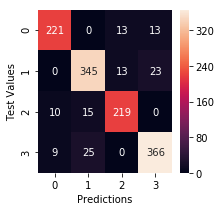

In [138]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

confMatKnn = confusion_matrix(y_test,y_pred_KNN)

f, ax = plt.subplots(figsize = (3,3))
sns.heatmap(confMatKnn,annot=True,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predictions")
plt.ylabel("Test Values")
plt.show()

In [139]:
from sklearn.ensemble import RandomForestClassifier

rfClassifier = RandomForestClassifier(n_estimators = 15,random_state = 1)
rfClassifier.fit(x_train,y_train.values.ravel())
y_pred_RF = rfClassifier.predict(x_test)
print("Random Forest Classifier score: " , rfClassifier.score(x_test,y_test))

Random Forest Classifier score:  0.9976415094339622


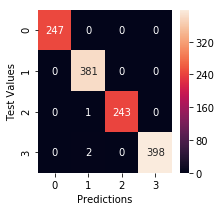

In [140]:
confMatRF = confusion_matrix(y_test,y_pred_RF)

f, ax = plt.subplots(figsize = (3,3))
sns.heatmap(confMatRF,annot=True,fmt=".0f",ax=ax)
plt.xlabel("Predictions")
plt.ylabel("Test Values")
plt.show()

# Saving our model to the disk

- This model will now be used to test our data in the Test Notebook.

In [141]:
import pickle

filename = 'RandomForestSeasonClassifier.sav'
pickle.dump(rfClassifier, open(filename, 'wb'))